# Deep Convolutional Neural Networks 

In this assignment, we will be using the Keras library to build, train, and evaluate some *relatively simple* Convolutional Neural Networks to demonstrate how adding layers to a network can improve accuracy, yet are more computationally expensive. 

The purpose of this assignment is for you to demonstrate understanding of the appropriate structure of a convolutional neural network and to give you an opportunity to research any parameters or elements of CNNs that you don't fully understand.

We will be using the cifar100 dataset for this assignment, however, in order to keep the dataset size small enough to be trained in a reasonable amount of time in a Google Colab, we will only be looking at two classes from the dataset - cats and dogs.

![CNN Structure Diagram](http://www.ryanleeallred.com/wp-content/uploads/2018/06/CNN-diagram.jpeg)


Using TensorFlow backend.


170500096/170498071 [==============================] - 16s 0us/step


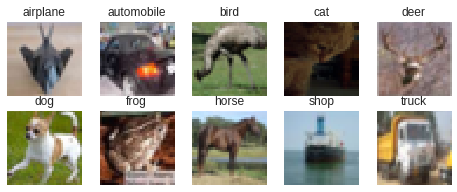

y_train length: 10000
x_train length: 10000
y_test length: 2000
x_test length: 2000


In [1]:
# Import important libraries and methods
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

# Important Hyperparameters
batch_size = 32 
num_classes = 2
epochs = 100

# Plot sample image from each cifar10 class.
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','shop','truck']
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

x_train = x_train[train_picks]
x_test = x_test[test_picks]

# check for image_data format and format image shape accordingly
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

# Check train and test lengths
print('y_train length:', len(y_train))
print('x_train length:', len(x_train))
print('y_test length:', len(y_test))
print('x_test length:', len(x_test))

# Model #1

This model will be almost as simple as we can make it. It should look something like:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final dropout layer
---
*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)


Then compile the model using categorical_crossentropy as your loss metric. Use the Adam optimizer, and accuracy as your overall scoring metric. 

If you're lost when you get to this point, make sure you look at the lecture colab for somewhat similar sample code.



In [0]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

np.random.seed(42)

# **Fit your model** 
Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

In [5]:
batch_size = 32
epochs = 50

fitted_model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.6892 - acc: 0.5285 - val_loss: 0.6766 - val_acc: 0.6025
Epoch 2/50
 6240/10000 [=================>............] - ETA: 10s - loss: 0.6640 - acc: 0.5949

10000/10000 [==============================] - 30s 3ms/step - loss: 0.6628 - acc: 0.5960 - val_loss: 0.6332 - val_acc: 0.6500
Epoch 3/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.6312 - acc: 0.6415 - val_loss: 0.6380 - val_acc: 0.6140
Epoch 4/50
 1856/10000 [====>.........................] - ETA: 21s - loss: 0.6126 - acc: 0.6616

10000/10000 [==============================] - 30s 3ms/step - loss: 0.6097 - acc: 0.6728 - val_loss: 0.5982 - val_acc: 0.6675
Epoch 5/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.5964 - acc: 0.6772 - val_loss: 0.5826 - val_acc: 0.6830
Epoch 6/50
  832/10000 [=>............................] - ETA: 24s - loss: 0.5857 - acc: 0.6875

10000/10000 [==============================] - 30s 3ms/step - loss: 0.5848 - acc: 0.6855 - val_loss: 0.5764 - val_acc: 0.6925
Epoch 7/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.5750 - acc: 0.6984 - val_loss: 0.5839 - val_acc: 0.6725
Epoch 8/50
  576/10000 [>.............................] - ETA: 25s - loss: 0.5737 - acc: 0.6979

10000/10000 [==============================] - 30s 3ms/step - loss: 0.5694 - acc: 0.7052 - val_loss: 0.5689 - val_acc: 0.6975
Epoch 9/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.5656 - acc: 0.7090 - val_loss: 0.5652 - val_acc: 0.6950
Epoch 10/50
  544/10000 [>.............................] - ETA: 25s - loss: 0.5556 - acc: 0.7022

10000/10000 [==============================] - 30s 3ms/step - loss: 0.5570 - acc: 0.7141 - val_loss: 0.5654 - val_acc: 0.6920
Epoch 11/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.5543 - acc: 0.7176 - val_loss: 0.5626 - val_acc: 0.6945
Epoch 12/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.5571 - acc: 0.7271

10000/10000 [==============================] - 30s 3ms/step - loss: 0.5429 - acc: 0.7280 - val_loss: 0.5608 - val_acc: 0.6945
Epoch 13/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.5375 - acc: 0.7312 - val_loss: 0.5566 - val_acc: 0.7030
Epoch 14/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.5021 - acc: 0.7292

10000/10000 [==============================] - 30s 3ms/step - loss: 0.5300 - acc: 0.7363 - val_loss: 0.5867 - val_acc: 0.6895
Epoch 15/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.5312 - acc: 0.7353 - val_loss: 0.5596 - val_acc: 0.6980
Epoch 16/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.5205 - acc: 0.7396

10000/10000 [==============================] - 30s 3ms/step - loss: 0.5243 - acc: 0.7405 - val_loss: 0.5619 - val_acc: 0.6985
Epoch 17/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.5195 - acc: 0.7447 - val_loss: 0.5540 - val_acc: 0.7095
Epoch 18/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.5043 - acc: 0.7354

10000/10000 [==============================] - 30s 3ms/step - loss: 0.5165 - acc: 0.7411 - val_loss: 0.5490 - val_acc: 0.7035
Epoch 19/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.5116 - acc: 0.7501 - val_loss: 0.5587 - val_acc: 0.7070
Epoch 20/50
  448/10000 [>.............................] - ETA: 25s - loss: 0.4740 - acc: 0.7679

10000/10000 [==============================] - 30s 3ms/step - loss: 0.5059 - acc: 0.7505 - val_loss: 0.5552 - val_acc: 0.7110
Epoch 21/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.5030 - acc: 0.7525 - val_loss: 0.5488 - val_acc: 0.7070
Epoch 22/50
  448/10000 [>.............................] - ETA: 25s - loss: 0.4963 - acc: 0.7879

10000/10000 [==============================] - 30s 3ms/step - loss: 0.5041 - acc: 0.7568 - val_loss: 0.5618 - val_acc: 0.7070
Epoch 23/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4970 - acc: 0.7521 - val_loss: 0.5482 - val_acc: 0.7080
Epoch 24/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4551 - acc: 0.7875

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4900 - acc: 0.7533 - val_loss: 0.5559 - val_acc: 0.7085
Epoch 25/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4899 - acc: 0.7563 - val_loss: 0.5493 - val_acc: 0.7140
Epoch 26/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4910 - acc: 0.7542

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4885 - acc: 0.7598 - val_loss: 0.5571 - val_acc: 0.7090
Epoch 27/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4924 - acc: 0.7615 - val_loss: 0.5517 - val_acc: 0.7155
Epoch 28/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4882 - acc: 0.7708

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4866 - acc: 0.7600 - val_loss: 0.5602 - val_acc: 0.6965
Epoch 29/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4879 - acc: 0.7620 - val_loss: 0.5502 - val_acc: 0.7160
Epoch 30/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4452 - acc: 0.7792

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4785 - acc: 0.7631 - val_loss: 0.5626 - val_acc: 0.7150
Epoch 31/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4845 - acc: 0.7667 - val_loss: 0.5464 - val_acc: 0.7150
Epoch 32/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4565 - acc: 0.7750

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4768 - acc: 0.7691 - val_loss: 0.5537 - val_acc: 0.7135
Epoch 33/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4747 - acc: 0.7682 - val_loss: 0.5469 - val_acc: 0.7190
Epoch 34/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4595 - acc: 0.7792

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4742 - acc: 0.7684 - val_loss: 0.5643 - val_acc: 0.7110
Epoch 35/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4736 - acc: 0.7720 - val_loss: 0.5648 - val_acc: 0.7145
Epoch 36/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4824 - acc: 0.7625

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4650 - acc: 0.7724 - val_loss: 0.5685 - val_acc: 0.7160
Epoch 37/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4679 - acc: 0.7774 - val_loss: 0.5567 - val_acc: 0.7085
Epoch 38/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4447 - acc: 0.7854

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4639 - acc: 0.7811 - val_loss: 0.5530 - val_acc: 0.7120
Epoch 39/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4681 - acc: 0.7690 - val_loss: 0.6229 - val_acc: 0.6935
Epoch 40/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4785 - acc: 0.7708

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4666 - acc: 0.7724 - val_loss: 0.5541 - val_acc: 0.7150
Epoch 41/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4689 - acc: 0.7702 - val_loss: 0.5840 - val_acc: 0.7055
Epoch 42/50
  480/10000 [>.............................] - ETA: 26s - loss: 0.4849 - acc: 0.7417

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4634 - acc: 0.7727 - val_loss: 0.5598 - val_acc: 0.7095
Epoch 43/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4616 - acc: 0.7759 - val_loss: 0.5578 - val_acc: 0.7055
Epoch 44/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4539 - acc: 0.7792

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4615 - acc: 0.7733 - val_loss: 0.5645 - val_acc: 0.7145
Epoch 45/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4598 - acc: 0.7762 - val_loss: 0.5641 - val_acc: 0.7045
Epoch 46/50
  480/10000 [>.............................] - ETA: 26s - loss: 0.4394 - acc: 0.7917

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4607 - acc: 0.7760 - val_loss: 0.5611 - val_acc: 0.7155
Epoch 47/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4602 - acc: 0.7760 - val_loss: 0.5519 - val_acc: 0.7160
Epoch 48/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4205 - acc: 0.8063

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4612 - acc: 0.7807 - val_loss: 0.5537 - val_acc: 0.7190
Epoch 49/50
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4596 - acc: 0.7830 - val_loss: 0.5693 - val_acc: 0.7135
Epoch 50/50
  480/10000 [>.............................] - ETA: 25s - loss: 0.4466 - acc: 0.7875

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4498 - acc: 0.7840 - val_loss: 0.5966 - val_acc: 0.7040


## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

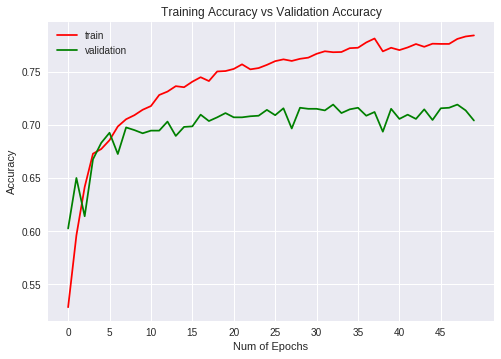

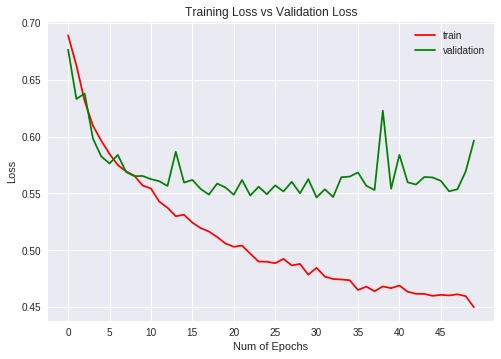

Accuracy: 70.40%


In [6]:
# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(fitted_model.history['acc'],'r')
plt.plot(fitted_model.history['val_acc'],'g')
plt.xticks(np.arange(0, 50, 5))
#plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(fitted_model.history['loss'],'r')
plt.plot(fitted_model.history['val_loss'],'g')
plt.xticks(np.arange(0, 50, 5))
#plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

![something a little deeper](http://www.ryanleeallred.com/wp-content/uploads/2018/06/a-little-deeper.gif)

# Model #2

Lets add an additional set of convolutional->activation->pooling to this model:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)

Again, compile the model using categorical_crossentropy as your loss metric and use the Adam optimizer, and accuracy as your overall scoring metric. 

In [0]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu')) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# **Fit your model**
Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

In [0]:
batch_size = 32
epochs = 50

fitted_model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/50
10000/10000 [==============================] - 4s 428us/step - loss: 0.6874 - acc: 0.5362 - val_loss: 0.6759 - val_acc: 0.5870
Epoch 2/50
10000/10000 [==============================] - 4s 385us/step - loss: 0.6709 - acc: 0.5928 - val_loss: 0.6738 - val_acc: 0.5655
Epoch 3/50
10000/10000 [==============================] - 4s 377us/step - loss: 0.6612 - acc: 0.6080 - val_loss: 0.6457 - val_acc: 0.6275
Epoch 4/50
10000/10000 [==============================] - 4s 381us/step - loss: 0.6522 - acc: 0.6198 - val_loss: 0.6515 - val_acc: 0.6175
Epoch 5/50
 1728/10000 [====>.........................] - ETA: 3s - loss: 0.6456 - acc: 0.6291

10000/10000 [==============================] - 4s 382us/step - loss: 0.6411 - acc: 0.6321 - val_loss: 0.6466 - val_acc: 0.6175
Epoch 6/50
10000/10000 [==============================] - 4s 381us/step - loss: 0.6340 - acc: 0.6422 - val_loss: 0.6122 - val_acc: 0.6610
Epoch 7/50
10000/10000 [==============================] - 4s 383us/step - loss: 0.6232 - acc: 0.6595 - val_loss: 0.6028 - val_acc: 0.6665
Epoch 8/50
10000/10000 [==============================] - 4s 383us/step - loss: 0.6079 - acc: 0.6714 - val_loss: 0.5877 - val_acc: 0.6850
Epoch 9/50
 5952/10000 [================>.............] - ETA: 1s - loss: 0.6106 - acc: 0.6731

10000/10000 [==============================] - 4s 381us/step - loss: 0.6065 - acc: 0.6734 - val_loss: 0.6310 - val_acc: 0.6405
Epoch 10/50
10000/10000 [==============================] - 4s 385us/step - loss: 0.5958 - acc: 0.6833 - val_loss: 0.5757 - val_acc: 0.6975
Epoch 11/50
10000/10000 [==============================] - 4s 381us/step - loss: 0.5950 - acc: 0.6841 - val_loss: 0.5676 - val_acc: 0.7045
Epoch 12/50
10000/10000 [==============================] - 4s 382us/step - loss: 0.5921 - acc: 0.6875 - val_loss: 0.5946 - val_acc: 0.6755
Epoch 13/50
 6240/10000 [=================>............] - ETA: 1s - loss: 0.5836 - acc: 0.6987

10000/10000 [==============================] - 4s 380us/step - loss: 0.5848 - acc: 0.6956 - val_loss: 0.5793 - val_acc: 0.6955
Epoch 14/50
10000/10000 [==============================] - 4s 380us/step - loss: 0.5805 - acc: 0.6975 - val_loss: 0.5948 - val_acc: 0.6830
Epoch 15/50
10000/10000 [==============================] - 4s 378us/step - loss: 0.5819 - acc: 0.6961 - val_loss: 0.5527 - val_acc: 0.7145
Epoch 16/50
10000/10000 [==============================] - 4s 381us/step - loss: 0.5771 - acc: 0.6981 - val_loss: 0.5921 - val_acc: 0.6875
Epoch 17/50
 6112/10000 [=================>............] - ETA: 1s - loss: 0.5765 - acc: 0.7027

10000/10000 [==============================] - 4s 380us/step - loss: 0.5742 - acc: 0.7062 - val_loss: 0.5510 - val_acc: 0.7185
Epoch 18/50
10000/10000 [==============================] - 4s 383us/step - loss: 0.5697 - acc: 0.7039 - val_loss: 0.5602 - val_acc: 0.7040
Epoch 19/50
10000/10000 [==============================] - 4s 381us/step - loss: 0.5668 - acc: 0.7101 - val_loss: 0.5511 - val_acc: 0.7200
Epoch 20/50
10000/10000 [==============================] - 4s 381us/step - loss: 0.5654 - acc: 0.7070 - val_loss: 0.5553 - val_acc: 0.7035
Epoch 21/50
 6240/10000 [=================>............] - ETA: 1s - loss: 0.5617 - acc: 0.7115

10000/10000 [==============================] - 4s 384us/step - loss: 0.5629 - acc: 0.7138 - val_loss: 0.5720 - val_acc: 0.6980
Epoch 22/50
10000/10000 [==============================] - 4s 387us/step - loss: 0.5615 - acc: 0.7148 - val_loss: 0.5391 - val_acc: 0.7235
Epoch 23/50
10000/10000 [==============================] - 4s 387us/step - loss: 0.5578 - acc: 0.7130 - val_loss: 0.5657 - val_acc: 0.7060
Epoch 24/50
10000/10000 [==============================] - 4s 377us/step - loss: 0.5577 - acc: 0.7183 - val_loss: 0.5518 - val_acc: 0.7150
Epoch 25/50
 6048/10000 [=================>............] - ETA: 1s - loss: 0.5558 - acc: 0.7183

10000/10000 [==============================] - 4s 380us/step - loss: 0.5561 - acc: 0.7176 - val_loss: 0.5294 - val_acc: 0.7445
Epoch 26/50
10000/10000 [==============================] - 4s 383us/step - loss: 0.5579 - acc: 0.7212 - val_loss: 0.5259 - val_acc: 0.7380
Epoch 27/50
10000/10000 [==============================] - 4s 384us/step - loss: 0.5481 - acc: 0.7262 - val_loss: 0.5285 - val_acc: 0.7405
Epoch 28/50
10000/10000 [==============================] - 4s 386us/step - loss: 0.5510 - acc: 0.7228 - val_loss: 0.5716 - val_acc: 0.6935
Epoch 29/50
 6048/10000 [=================>............] - ETA: 1s - loss: 0.5506 - acc: 0.7312

10000/10000 [==============================] - 4s 381us/step - loss: 0.5444 - acc: 0.7299 - val_loss: 0.5166 - val_acc: 0.7425
Epoch 30/50
10000/10000 [==============================] - 4s 385us/step - loss: 0.5479 - acc: 0.7246 - val_loss: 0.5218 - val_acc: 0.7420
Epoch 31/50
10000/10000 [==============================] - 4s 384us/step - loss: 0.5467 - acc: 0.7276 - val_loss: 0.5242 - val_acc: 0.7365
Epoch 32/50
10000/10000 [==============================] - 4s 378us/step - loss: 0.5396 - acc: 0.7278 - val_loss: 0.5379 - val_acc: 0.7270
Epoch 33/50
 6208/10000 [=================>............] - ETA: 1s - loss: 0.5470 - acc: 0.7270

10000/10000 [==============================] - 4s 387us/step - loss: 0.5488 - acc: 0.7261 - val_loss: 0.5326 - val_acc: 0.7315
Epoch 34/50
10000/10000 [==============================] - 4s 388us/step - loss: 0.5401 - acc: 0.7285 - val_loss: 0.5424 - val_acc: 0.7215
Epoch 35/50
10000/10000 [==============================] - 4s 385us/step - loss: 0.5361 - acc: 0.7310 - val_loss: 0.5514 - val_acc: 0.7120
Epoch 36/50
10000/10000 [==============================] - 4s 389us/step - loss: 0.5391 - acc: 0.7252 - val_loss: 0.5106 - val_acc: 0.7515
Epoch 37/50
 6176/10000 [=================>............] - ETA: 1s - loss: 0.5400 - acc: 0.7312

10000/10000 [==============================] - 4s 379us/step - loss: 0.5375 - acc: 0.7321 - val_loss: 0.5217 - val_acc: 0.7225
Epoch 38/50
10000/10000 [==============================] - 4s 380us/step - loss: 0.5319 - acc: 0.7382 - val_loss: 0.5172 - val_acc: 0.7415
Epoch 39/50
10000/10000 [==============================] - 4s 384us/step - loss: 0.5311 - acc: 0.7375 - val_loss: 0.5292 - val_acc: 0.7370
Epoch 40/50
10000/10000 [==============================] - 4s 381us/step - loss: 0.5331 - acc: 0.7370 - val_loss: 0.5073 - val_acc: 0.7555
Epoch 41/50
 5952/10000 [================>.............] - ETA: 1s - loss: 0.5282 - acc: 0.7441

10000/10000 [==============================] - 4s 385us/step - loss: 0.5321 - acc: 0.7410 - val_loss: 0.5504 - val_acc: 0.7215
Epoch 42/50
10000/10000 [==============================] - 4s 384us/step - loss: 0.5341 - acc: 0.7389 - val_loss: 0.5356 - val_acc: 0.7160
Epoch 43/50
10000/10000 [==============================] - 4s 382us/step - loss: 0.5327 - acc: 0.7346 - val_loss: 0.5177 - val_acc: 0.7340
Epoch 44/50
10000/10000 [==============================] - 4s 385us/step - loss: 0.5322 - acc: 0.7389 - val_loss: 0.5247 - val_acc: 0.7375
Epoch 45/50
 6016/10000 [=================>............] - ETA: 1s - loss: 0.5205 - acc: 0.7463

10000/10000 [==============================] - 4s 384us/step - loss: 0.5236 - acc: 0.7445 - val_loss: 0.5032 - val_acc: 0.7490
Epoch 46/50
10000/10000 [==============================] - 4s 383us/step - loss: 0.5262 - acc: 0.7392 - val_loss: 0.5065 - val_acc: 0.7460
Epoch 47/50
10000/10000 [==============================] - 4s 385us/step - loss: 0.5265 - acc: 0.7378 - val_loss: 0.5394 - val_acc: 0.7290
Epoch 48/50
10000/10000 [==============================] - 4s 388us/step - loss: 0.5270 - acc: 0.7373 - val_loss: 0.4994 - val_acc: 0.7540
Epoch 49/50
 6144/10000 [=================>............] - ETA: 1s - loss: 0.5178 - acc: 0.7417

10000/10000 [==============================] - 4s 388us/step - loss: 0.5237 - acc: 0.7362 - val_loss: 0.5060 - val_acc: 0.7400
Epoch 50/50
10000/10000 [==============================] - 4s 389us/step - loss: 0.5260 - acc: 0.7434 - val_loss: 0.4978 - val_acc: 0.7525


## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

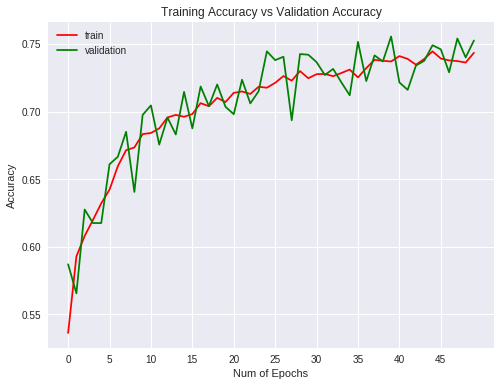

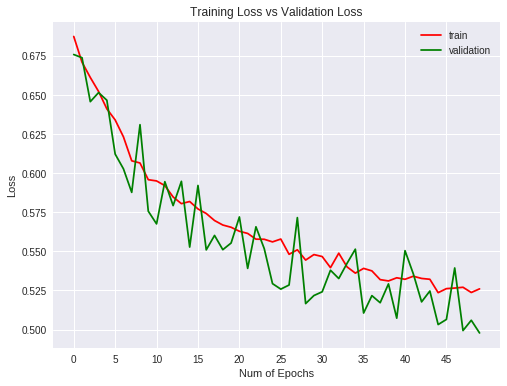

Accuracy: 75.25%


In [0]:
# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(fitted_model.history['acc'],'r')
plt.plot(fitted_model.history['val_acc'],'g')
plt.xticks(np.arange(0, 50, 5))
#plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(fitted_model.history['loss'],'r')
plt.plot(fitted_model.history['val_loss'],'g')
plt.xticks(np.arange(0, 50, 5))
#plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

![We Need To Go Deeper](http://www.ryanleeallred.com/wp-content/uploads/2018/06/go-deeper.gif)

# Model #3

Finally, one more set of convolutional/activation/pooling:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---

*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)

Again, compile the model using categorical_crossentropy as your loss metric and use the Adam optimizer, and accuracy as your overall scoring metric. 

In [0]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu',padding = "same")) 
model.add(Conv2D(8, (3, 3), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu',padding = "same")) 
model.add(Conv2D(8, (3, 3), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

## Fit your model

Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

In [0]:
batch_size = 32
epochs = 50

fitted_model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True) 

Train on 10000 samples, validate on 2000 samples
Epoch 1/50
10000/10000 [==============================] - 5s 538us/step - loss: 0.6921 - acc: 0.5197 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 2/50
10000/10000 [==============================] - 5s 466us/step - loss: 0.6863 - acc: 0.5477 - val_loss: 0.6746 - val_acc: 0.6100
Epoch 3/50
10000/10000 [==============================] - 5s 475us/step - loss: 0.6744 - acc: 0.5816 - val_loss: 0.6748 - val_acc: 0.5940
Epoch 4/50
 7072/10000 [====================>.........] - ETA: 1s - loss: 0.6650 - acc: 0.6011

10000/10000 [==============================] - 5s 473us/step - loss: 0.6646 - acc: 0.6012 - val_loss: 0.6711 - val_acc: 0.5925
Epoch 5/50
10000/10000 [==============================] - 5s 476us/step - loss: 0.6537 - acc: 0.6256 - val_loss: 0.6363 - val_acc: 0.6445
Epoch 6/50
10000/10000 [==============================] - 5s 479us/step - loss: 0.6446 - acc: 0.6346 - val_loss: 0.6208 - val_acc: 0.6705
Epoch 7/50
10000/10000 [==============================] - 5s 475us/step - loss: 0.6334 - acc: 0.6467 - val_loss: 0.6333 - val_acc: 0.6345
Epoch 8/50
 1888/10000 [====>.........................] - ETA: 3s - loss: 0.6130 - acc: 0.6610

10000/10000 [==============================] - 5s 473us/step - loss: 0.6247 - acc: 0.6577 - val_loss: 0.6080 - val_acc: 0.6810
Epoch 9/50
10000/10000 [==============================] - 5s 468us/step - loss: 0.6186 - acc: 0.6687 - val_loss: 0.6068 - val_acc: 0.6735
Epoch 10/50
10000/10000 [==============================] - 5s 466us/step - loss: 0.6110 - acc: 0.6721 - val_loss: 0.5722 - val_acc: 0.7110
Epoch 11/50
10000/10000 [==============================] - 5s 474us/step - loss: 0.6090 - acc: 0.6733 - val_loss: 0.6160 - val_acc: 0.6590
Epoch 12/50
 1408/10000 [===>..........................] - ETA: 3s - loss: 0.6045 - acc: 0.6797

10000/10000 [==============================] - 5s 472us/step - loss: 0.6019 - acc: 0.6798 - val_loss: 0.5642 - val_acc: 0.7150
Epoch 13/50
10000/10000 [==============================] - 5s 474us/step - loss: 0.5978 - acc: 0.6853 - val_loss: 0.5704 - val_acc: 0.7070
Epoch 14/50
10000/10000 [==============================] - 5s 467us/step - loss: 0.5885 - acc: 0.6905 - val_loss: 0.5536 - val_acc: 0.7215
Epoch 15/50
10000/10000 [==============================] - 5s 474us/step - loss: 0.5883 - acc: 0.6960 - val_loss: 0.5694 - val_acc: 0.7045
Epoch 16/50
 1312/10000 [==>...........................] - ETA: 3s - loss: 0.5809 - acc: 0.7073

10000/10000 [==============================] - 5s 465us/step - loss: 0.5774 - acc: 0.7021 - val_loss: 0.5674 - val_acc: 0.6955
Epoch 17/50
10000/10000 [==============================] - 5s 471us/step - loss: 0.5802 - acc: 0.7004 - val_loss: 0.5740 - val_acc: 0.7015
Epoch 18/50
10000/10000 [==============================] - 5s 471us/step - loss: 0.5733 - acc: 0.7080 - val_loss: 0.5584 - val_acc: 0.7160
Epoch 19/50
10000/10000 [==============================] - 5s 475us/step - loss: 0.5738 - acc: 0.7067 - val_loss: 0.5671 - val_acc: 0.6990
Epoch 20/50
 1312/10000 [==>...........................] - ETA: 3s - loss: 0.5534 - acc: 0.7188

10000/10000 [==============================] - 5s 466us/step - loss: 0.5657 - acc: 0.7134 - val_loss: 0.5694 - val_acc: 0.6990
Epoch 21/50
10000/10000 [==============================] - 5s 472us/step - loss: 0.5682 - acc: 0.7111 - val_loss: 0.5563 - val_acc: 0.7180
Epoch 22/50
10000/10000 [==============================] - 5s 475us/step - loss: 0.5681 - acc: 0.7018 - val_loss: 0.5469 - val_acc: 0.7250
Epoch 23/50
10000/10000 [==============================] - 5s 470us/step - loss: 0.5606 - acc: 0.7181 - val_loss: 0.5732 - val_acc: 0.6910
Epoch 24/50
 1184/10000 [==>...........................] - ETA: 4s - loss: 0.5606 - acc: 0.7213

10000/10000 [==============================] - 5s 475us/step - loss: 0.5595 - acc: 0.7175 - val_loss: 0.5301 - val_acc: 0.7340
Epoch 25/50
10000/10000 [==============================] - 5s 466us/step - loss: 0.5607 - acc: 0.7165 - val_loss: 0.5249 - val_acc: 0.7460
Epoch 26/50
10000/10000 [==============================] - 5s 474us/step - loss: 0.5588 - acc: 0.7171 - val_loss: 0.5343 - val_acc: 0.7310
Epoch 27/50
10000/10000 [==============================] - 5s 475us/step - loss: 0.5540 - acc: 0.7232 - val_loss: 0.5387 - val_acc: 0.7300
Epoch 28/50
 1024/10000 [==>...........................] - ETA: 4s - loss: 0.5653 - acc: 0.7344

10000/10000 [==============================] - 5s 469us/step - loss: 0.5578 - acc: 0.7231 - val_loss: 0.5189 - val_acc: 0.7535
Epoch 29/50
10000/10000 [==============================] - 5s 472us/step - loss: 0.5506 - acc: 0.7237 - val_loss: 0.5729 - val_acc: 0.6945
Epoch 30/50
10000/10000 [==============================] - 5s 473us/step - loss: 0.5479 - acc: 0.7243 - val_loss: 0.5298 - val_acc: 0.7355
Epoch 31/50
10000/10000 [==============================] - 5s 470us/step - loss: 0.5509 - acc: 0.7237 - val_loss: 0.5227 - val_acc: 0.7385
Epoch 32/50
 1024/10000 [==>...........................] - ETA: 4s - loss: 0.5397 - acc: 0.7207

10000/10000 [==============================] - 5s 472us/step - loss: 0.5493 - acc: 0.7243 - val_loss: 0.5879 - val_acc: 0.6735
Epoch 33/50
10000/10000 [==============================] - 5s 467us/step - loss: 0.5448 - acc: 0.7277 - val_loss: 0.5292 - val_acc: 0.7330
Epoch 34/50
10000/10000 [==============================] - 5s 473us/step - loss: 0.5479 - acc: 0.7280 - val_loss: 0.5112 - val_acc: 0.7525
Epoch 35/50
10000/10000 [==============================] - 5s 474us/step - loss: 0.5442 - acc: 0.7289 - val_loss: 0.5190 - val_acc: 0.7445
Epoch 36/50
 1056/10000 [==>...........................] - ETA: 4s - loss: 0.5405 - acc: 0.7169

10000/10000 [==============================] - 5s 471us/step - loss: 0.5432 - acc: 0.7230 - val_loss: 0.5402 - val_acc: 0.7300
Epoch 37/50
10000/10000 [==============================] - 5s 473us/step - loss: 0.5458 - acc: 0.7277 - val_loss: 0.5064 - val_acc: 0.7515
Epoch 38/50
10000/10000 [==============================] - 5s 475us/step - loss: 0.5425 - acc: 0.7334 - val_loss: 0.5266 - val_acc: 0.7320
Epoch 39/50
10000/10000 [==============================] - 5s 472us/step - loss: 0.5378 - acc: 0.7294 - val_loss: 0.5151 - val_acc: 0.7480
Epoch 40/50
 1152/10000 [==>...........................] - ETA: 3s - loss: 0.5484 - acc: 0.7318

10000/10000 [==============================] - 5s 468us/step - loss: 0.5412 - acc: 0.7301 - val_loss: 0.5651 - val_acc: 0.7000
Epoch 41/50
10000/10000 [==============================] - 5s 471us/step - loss: 0.5389 - acc: 0.7309 - val_loss: 0.4964 - val_acc: 0.7580
Epoch 42/50
10000/10000 [==============================] - 5s 473us/step - loss: 0.5367 - acc: 0.7319 - val_loss: 0.5274 - val_acc: 0.7310
Epoch 43/50
10000/10000 [==============================] - 5s 471us/step - loss: 0.5398 - acc: 0.7317 - val_loss: 0.5299 - val_acc: 0.7365
Epoch 44/50
 1184/10000 [==>...........................] - ETA: 3s - loss: 0.5338 - acc: 0.7416

10000/10000 [==============================] - 5s 471us/step - loss: 0.5366 - acc: 0.7366 - val_loss: 0.4969 - val_acc: 0.7585
Epoch 45/50
10000/10000 [==============================] - 5s 473us/step - loss: 0.5334 - acc: 0.7332 - val_loss: 0.5052 - val_acc: 0.7440
Epoch 46/50
10000/10000 [==============================] - 5s 470us/step - loss: 0.5320 - acc: 0.7349 - val_loss: 0.6485 - val_acc: 0.6330
Epoch 47/50
10000/10000 [==============================] - 5s 469us/step - loss: 0.5349 - acc: 0.7334 - val_loss: 0.5058 - val_acc: 0.7565
Epoch 48/50
 1312/10000 [==>...........................] - ETA: 3s - loss: 0.5411 - acc: 0.7386

10000/10000 [==============================] - 5s 471us/step - loss: 0.5299 - acc: 0.7367 - val_loss: 0.4975 - val_acc: 0.7585
Epoch 49/50
10000/10000 [==============================] - 5s 475us/step - loss: 0.5315 - acc: 0.7358 - val_loss: 0.5116 - val_acc: 0.7390
Epoch 50/50
10000/10000 [==============================] - 5s 456us/step - loss: 0.5340 - acc: 0.7347 - val_loss: 0.5021 - val_acc: 0.7465


## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

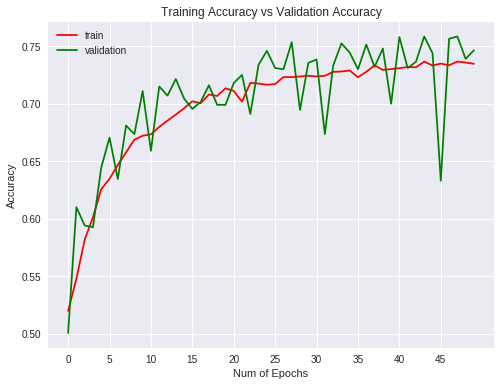

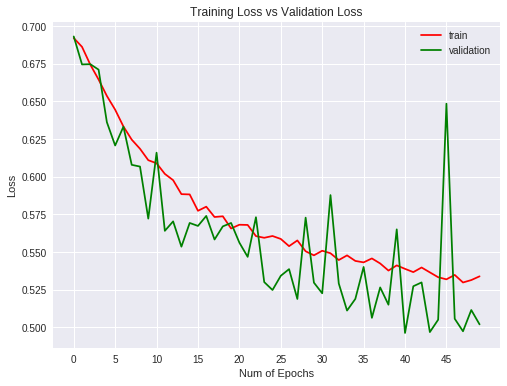

Accuracy: 74.65%


In [0]:
# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(fitted_model.history['acc'],'r')
plt.plot(fitted_model.history['val_acc'],'g')
plt.xticks(np.arange(0, 50, 5))
#plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(fitted_model.history['loss'],'r')
plt.plot(fitted_model.history['val_loss'],'g')
plt.xticks(np.arange(0, 50, 5))
#plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

From all the above three graphs, it is clear that, accuracy of model increases as the number of epochs increases.

# Stretch Goal:

## Use other classes from Cifar10
Try using different classes from the Cifar10 dataset or use all 10. You might need to sample the training data or limit the number of epochs if you decide to use the entire dataset due to processing constraints.

## Hyperparameter Tune Your Model
If you have successfully complete shown how increasing the depth of a neural network can improve its accuracy, and you feel like you have a solid understanding of all of the different parts of CNNs, try hyperparameter tuning your strongest model to see how much additional accuracy you can squeeze out of it. This will also give you a chance to research the different hyperparameters as well as their significance/purpose. (There are lots and lots)

---

Here's a helpful article that will show you how to get started using GridSearch to hyperaparameter tune your CNN. (should you desire to use that method):

[Grid Search Hyperparameters for Deep Learning Models in Python With Keras](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)

In [3]:
#use all the classes from Cifar10 dataset
# the data, shuffled and split between train and test sets
seed = 42
np.random.seed(seed)
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

# normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# one hot encode outputs
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# Check train and test lengths
print('y_train length:', len(y_train))
print('x_train length:', len(x_train))
print('y_test length:', len(y_test))
print('x_test length:', len(x_test))

y_train length: 50000
x_train length: 50000
y_test length: 10000
x_test length: 10000


Use Grid search to find the number of epochs

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25)) 

    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
    #print(model.summary())
    return model
  
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)  


In [0]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [4]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1,verbose=1)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [11]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

In [0]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

OSError: ignored